In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [22]:
df_swimming = pd.read_csv('Olympic_Swimming_Results_1912to2020.csv')

In [23]:
df_swimming.head()

,Location,Year,Distance (in meters),Stroke,Relay?,Gender,Team,Athlete,Results,Rank
0,Tokyo,2020,100m,Backstroke,0,Men,ROC,Evgeny Rylov,51.98,1
1,Tokyo,2020,100m,Backstroke,0,Men,ROC,Kliment Kolesnikov,52,2
2,Tokyo,2020,100m,Backstroke,0,Men,USA,Ryan Murphy,52.19,3
3,Tokyo,2020,100m,Backstroke,0,Men,ITA,Thomas Ceccon,52.3,4
4,Tokyo,2020,100m,Backstroke,0,Men,CHN,Jiayu Xu,52.51,4


In [24]:
df_swimming.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4359 entries, 0 to 4358
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Location              4359 non-null   object
 1   Year                  4359 non-null   int64 
 2   Distance (in meters)  4359 non-null   object
 3   Stroke                4359 non-null   object
 4   Relay?                4359 non-null   int64 
 5   Gender                4359 non-null   object
 6   Team                  4359 non-null   object
 7   Athlete               4345 non-null   object
 8   Results               4331 non-null   object
 9   Rank                  4359 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 340.7+ KB


In [25]:
# Set the display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [26]:
# Checking for NaN values in each column
nan_values = df_swimming.isna().any()
nan_values


Location                False
Year                    False
Distance (in meters)    False
Stroke                  False
Relay?                  False
Gender                  False
Team                    False
Athlete                  True
Results                  True
Rank                    False
dtype: bool

In [27]:
# Getting the rows where NaN values exist
rows_with_nan = df_swimming[df_swimming.isna().any(axis=1)]

# Printing the NaN values and corresponding rows
for column in nan_values.index:
    if nan_values[column]:
        print(f"NaN values in column '{column}':")
        print(rows_with_nan[rows_with_nan[column].isna()])
        print()

NaN values in column 'Athlete':
       Location  Year Distance (in meters)     Stroke  Relay? Gender Team  \
435         Rio  2016                4x100     Medley       1  Women  CHN   
436         Rio  2016                4x100     Medley       1  Women  CAN   
437         Rio  2016                4x100     Medley       1  Women  RUS   
438         Rio  2016                4x100     Medley       1  Women  GBR   
445         Rio  2016                4x200  Freestyle       1    Men  GER   
952     Beijing  2008                4x200  Freestyle       1    Men  USA   
1432     Sydney  2000                4x100  Freestyle       1    Men  AUS   
1467     Sydney  2000                4x200  Freestyle       1    Men  ITA   
1688    Atlanta  1996                4x100  Freestyle       1    Men  USA   
2227      Seoul  1988                4x200  Freestyle       1    Men  AUS   
2230      Seoul  1988                4x200  Freestyle       1    Men  FRA   
3625       Rome  1960                4x200  

In [28]:
#To clean the data, in the Athlete column, the NaN values will be replaced with the values written in the Team Column
df_swimming['Athlete'].fillna(df_swimming['Team'], inplace=True)
df_swimming['Results'].fillna(method='ffill', inplace=True)

In [29]:
#Check if there are NaN values
df_swimming.isna().any()

Location                False
Year                    False
Distance (in meters)    False
Stroke                  False
Relay?                  False
Gender                  False
Team                    False
Athlete                 False
Results                 False
Rank                    False
dtype: bool

In [30]:
df_swimming.dtypes

Location                object
Year                     int64
Distance (in meters)    object
Stroke                  object
Relay?                   int64
Gender                  object
Team                    object
Athlete                 object
Results                 object
Rank                     int64
dtype: object

df_swimming['Distance (in meters)'].head()

In [31]:
#Change the distance to get only the numerical value
#Change the gender by a number, 0 for men and 1 for women
df_swimming['Distance (in meters)'] = df_swimming['Distance (in meters)'].str.extract('(\d+)').astype(int)
df_swimming['Gender'] = df_swimming['Gender'].replace({'Men': 0, 'Women': 1})

In [32]:
df_swimming.head()

,Location,Year,Distance (in meters),Stroke,Relay?,Gender,Team,Athlete,Results,Rank
0,Tokyo,2020,100,Backstroke,0,0,ROC,Evgeny Rylov,51.98,1
1,Tokyo,2020,100,Backstroke,0,0,ROC,Kliment Kolesnikov,52,2
2,Tokyo,2020,100,Backstroke,0,0,USA,Ryan Murphy,52.19,3
3,Tokyo,2020,100,Backstroke,0,0,ITA,Thomas Ceccon,52.3,4
4,Tokyo,2020,100,Backstroke,0,0,CHN,Jiayu Xu,52.51,4


In [33]:
#Replace the ROC team used in 2020 Olympics by RUS, that corresponds to Russia
df_swimming['Team'] = df_swimming['Team'].replace('ROC', 'RUS')

In [34]:
df_swimming.head()

,Location,Year,Distance (in meters),Stroke,Relay?,Gender,Team,Athlete,Results,Rank
0,Tokyo,2020,100,Backstroke,0,0,RUS,Evgeny Rylov,51.98,1
1,Tokyo,2020,100,Backstroke,0,0,RUS,Kliment Kolesnikov,52,2
2,Tokyo,2020,100,Backstroke,0,0,USA,Ryan Murphy,52.19,3
3,Tokyo,2020,100,Backstroke,0,0,ITA,Thomas Ceccon,52.3,4
4,Tokyo,2020,100,Backstroke,0,0,CHN,Jiayu Xu,52.51,4


In [35]:
#Create a new column that shows the total time (Results) in seconds
# Convert 'Results' column to string type
df_swimming['Results'] = df_swimming['Results'].astype(str)

# Define a function to convert time values to seconds and hundreds of seconds
def convert_time(time_str):
    try:
        if ':' in time_str:
            # Time is in the format HH:MM:SS.SS (hours, minutes, seconds, and hundredths of a second)
            parts = time_str.split(':')
            if len(parts) == 3:
                hours, minutes, seconds = parts
                total_seconds = int(hours) * 3600 + int(minutes) * 60 + float(seconds)
            elif len(parts) == 2:
                minutes, seconds = parts
                total_seconds = int(minutes) * 60 + float(seconds)
            else:
                raise ValueError("Invalid time format")
        else:
            # Time is in the format SS.SS (seconds and hundredths of a second)
            total_seconds = float(time_str)
        return total_seconds
    except:
        # Invalid or unexpected value, assign NaN
        return np.nan

# Apply the conversion function to the 'Results' column and create a new column 'TimeInSeconds'
df_swimming['TimeInSeconds'] = df_swimming['Results'].apply(convert_time)

In [78]:
df_swimming[(df_swimming['Location'] == 'Tokyo') & (df_swimming['Gender'] == 0) & (df_swimming['Rank'] == 1)]

,Location,Year,Distance (in meters),Stroke,Relay?,Gender,Team,Athlete,Results,Rank,TimeInSeconds
0,Tokyo,2020,100,0,0,0,RUS,Evgeny Rylov,51.98,1,51.98
8,Tokyo,2020,100,1,0,0,GBR,Adam Peaty,57.37,1,57.37
16,Tokyo,2020,100,2,0,0,USA,Caeleb Dressel,49.45,1,49.45
24,Tokyo,2020,100,3,0,0,USA,Caeleb Dressel,47.02,1,47.02
32,Tokyo,2020,1500,3,0,0,USA,Robert Finke,14:39.65,1,879.65
40,Tokyo,2020,200,0,0,0,RUS,Evgeny Rylov,1:53.27,1,113.27
48,Tokyo,2020,200,1,0,0,AUS,Izaac Stubblety-Cook,2:06.38,1,126.38
56,Tokyo,2020,200,2,0,0,HUN,Kristof Kristof Milak,1:51.25,1,111.25
64,Tokyo,2020,200,3,0,0,GBR,Tom Dean,1:44.22,1,104.22
72,Tokyo,2020,200,4,0,0,CHN,Shun Wang,1:55.00,1,115.00


In [37]:
df_swimming['Team'].unique()

array(['RUS', 'USA', 'ITA', 'CHN', 'ESP', 'AUS', 'ROU', 'GBR', 'NED',
       'BLR', 'HUN', 'SUI', 'POL', 'GUA', 'BUL', 'FRA', 'KOR', 'UKR',
       'GER', 'AUT', 'JPN', 'FIN', 'SWE', 'RSA', 'BRA', 'LTU', 'NZL',
       'TUN', 'GRE', 'CAN', 'ISR', 'IRL', 'HKG', 'BEL', 'CZE', 'DEN',
       'KAZ', 'ISL', 'JAM', 'SGP', 'NOR', 'ZIM', 'NZ', 'NL', 'IR', 'NLD',
       'SRB', 'CUB', 'ZAF', 'TTO', 'BAH', 'VEN', 'KEN', 'PNG', 'SLO',
       'CRO', 'SVK', 'ALG', 'ARG', 'CRC', 'PUR', 'MDA', 'BAR', 'EUN',
       'SUR', 'Unified Team ', 'TCH', 'URS', 'GDR', 'FRG', 'YUG', 'SUN',
       'BGR', 'COL', 'POR', 'CHE', 'MEX', 'ECU', 'PER', 'URU', 'EGY',
       'PHI', 'BER', 'IND', 'LUX', 'ANZ'], dtype=object)

In [46]:
df_swimming['Stroke'].unique()

array(['Backstroke', 'Breaststroke', 'Butterfly', 'Freestyle',
       'Individual medley', 'Medley'], dtype=object)

In [47]:
#Replace the text in the Stroke column and assign it to numbers
# Define the mapping of stroke names to numerical values
stroke_mapping = {
    'Backstroke': 0,
    'Breaststroke': 1,
    'Butterfly': 2,
    'Freestyle': 3,
    'Individual medley': 4,
    'Medley': 5
}

# Replace the values in the 'Stroke' column with numerical representations
df_swimming['Stroke'] = df_swimming['Stroke'].replace(stroke_mapping)


In [48]:
#Check how the total time in seconds evolve for 100 freestyle for men in everyolympic
df_swimming.dtypes

Location                 object
Year                      int64
Distance (in meters)      int64
Stroke                    int64
Relay?                    int64
Gender                    int64
Team                     object
Athlete                  object
Results                  object
Rank                      int64
TimeInSeconds           float64
dtype: object

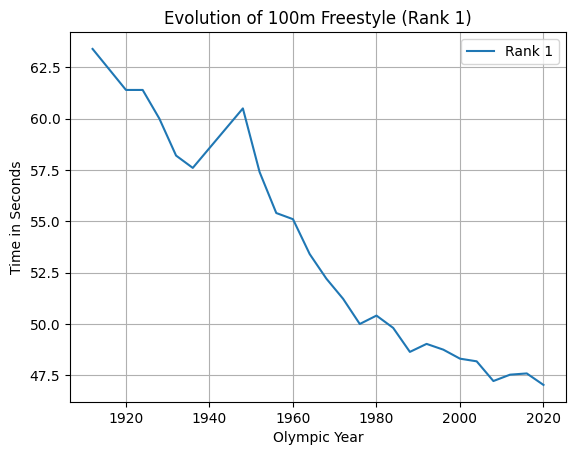

In [93]:
# Filter the dataset for 100m freestyle events
df_100_freestyle = df_swimming[(df_swimming['Distance (in meters)'] == 100) & (df_swimming['Gender'] == 0) & (df_swimming['Stroke'] == 3)]

# Filter and keep only the rows with Rank = 1
df_rank_1 = df_100_freestyle[df_100_freestyle['Rank'] == 1]

# Plot the TimeInSeconds for each swimmer
plt.plot(df_rank_1['Year'], df_rank_1['TimeInSeconds'], linestyle='-', label='Rank 1')

plt.xlabel('Olympic Year')
plt.ylabel('Time in Seconds')
plt.title('Evolution of 100m Freestyle (Rank 1)')
plt.legend()
plt.grid()
plt.show()

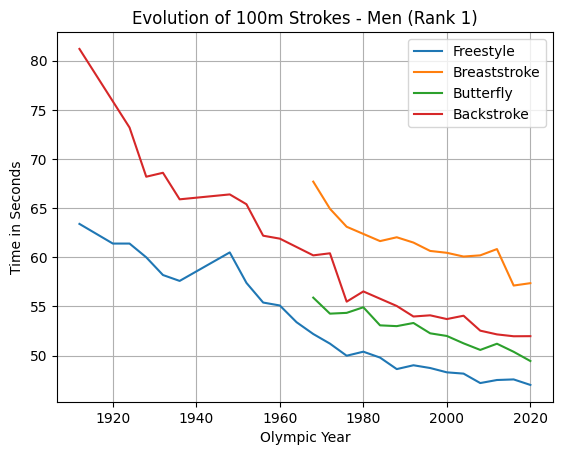

In [79]:
# Filter the dataset for 100m freestyle, 100m breaststroke, 100m butterfly, and 100m backstroke events
df_100_freestyle = df_swimming[(df_swimming['Distance (in meters)'] == 100) & (df_swimming['Stroke'] == 3) & (df_swimming['Gender'] == 0)]
df_100_breaststroke = df_swimming[(df_swimming['Distance (in meters)'] == 100) & (df_swimming['Stroke'] == 1) & (df_swimming['Gender'] == 0)]
df_100_butterfly = df_swimming[(df_swimming['Distance (in meters)'] == 100) & (df_swimming['Stroke'] == 2) & (df_swimming['Gender'] == 0)]
df_100_backstroke = df_swimming[(df_swimming['Distance (in meters)'] == 100) & (df_swimming['Stroke'] == 0) & (df_swimming['Gender'] == 0)]

# Filter and keep only the rows with Rank = 1
df_rank_1_freestyle = df_100_freestyle[df_100_freestyle['Rank'] == 1]
df_rank_1_breaststroke = df_100_breaststroke[df_100_breaststroke['Rank'] == 1]
df_rank_1_butterfly = df_100_butterfly[df_100_butterfly['Rank'] == 1]
df_rank_1_backstroke = df_100_backstroke[df_100_backstroke['Rank'] == 1]

# Plot the TimeInSeconds evolution for each stroke
plt.plot(df_rank_1_freestyle['Year'], df_rank_1_freestyle['TimeInSeconds'], label='Freestyle')
plt.plot(df_rank_1_breaststroke['Year'], df_rank_1_breaststroke['TimeInSeconds'], label='Breaststroke')
plt.plot(df_rank_1_butterfly['Year'], df_rank_1_butterfly['TimeInSeconds'], label='Butterfly')
plt.plot(df_rank_1_backstroke['Year'], df_rank_1_backstroke['TimeInSeconds'], label='Backstroke')

plt.xlabel('Olympic Year')
plt.ylabel('Time in Seconds')
plt.title('Evolution of 100m Strokes - Men (Rank 1)')
plt.legend()
plt.grid()
plt.show()



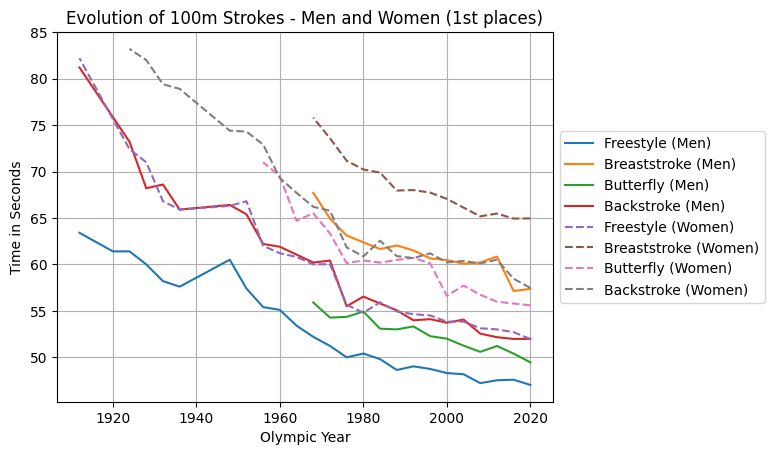

In [88]:
# Plot the TimeInSeconds evolution for each stroke
plt.plot(df_rank_1_freestyle_male['Year'], df_rank_1_freestyle_male['TimeInSeconds'], label='Freestyle (Men)')
plt.plot(df_rank_1_breaststroke_male['Year'], df_rank_1_breaststroke_male['TimeInSeconds'], label='Breaststroke (Men)')
plt.plot(df_rank_1_butterfly_male['Year'], df_rank_1_butterfly_male['TimeInSeconds'], label='Butterfly (Men)')
plt.plot(df_rank_1_backstroke_male['Year'], df_rank_1_backstroke_male['TimeInSeconds'], label='Backstroke (Men)')

plt.plot(df_rank_1_freestyle_female['Year'], df_rank_1_freestyle_female['TimeInSeconds'], label='Freestyle (Women)', linestyle='--')
plt.plot(df_rank_1_breaststroke_female['Year'], df_rank_1_breaststroke_female['TimeInSeconds'], label='Breaststroke (Women)', linestyle='--')
plt.plot(df_rank_1_butterfly_female['Year'], df_rank_1_butterfly_female['TimeInSeconds'], label='Butterfly (Women)', linestyle='--')
plt.plot(df_rank_1_backstroke_female['Year'], df_rank_1_backstroke_female['TimeInSeconds'], label='Backstroke (Women)', linestyle='--')

plt.xlabel('Olympic Year')
plt.ylabel('Time in Seconds')
plt.title('Evolution of 100m Strokes - Men and Women (1st places)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()

